# Investigating Fandango Movie Ratings
### A Dataquest.io Guided 

This is a guided project that is part of the cirriculum in Dataquest.io. In 2015, a data journalist named Walt Hickey published an article with findings that Fandango had, on average higher ratings and that there could be bias in the way how their ratings are handled.

In this project, we investigate ratings several years later to see if there was any change since Hickey's analysis was done.

In [3]:
import pandas as pd

fandango = pd.read_csv("data/fandango_score_comparison.csv")
movie_ratings = pd.read_csv("data/movie_ratings_16_17.csv")

# take just the relevant data
#fandango = fandango.loc[:,["FILM", "Fanfango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]]
#movie_ratings = movie_ratings.loc[:,["movie", "year", "fandango"]]

fandango["RottenTomatoes"].unique

<bound method Series.unique of 0       74
1       85
2       80
3       18
4       14
5       63
6       42
7       86
8       99
9       89
10      84
11      82
12      99
13      51
14      90
15       9
16      46
17      59
18      50
19      17
20      79
21      59
22      68
23      60
24      85
25      99
26      92
27      88
28      96
29      92
      ... 
116     89
117     81
118     80
119     99
120     84
121     84
122     95
123     62
124     45
125     27
126     52
127     60
128     92
129     97
130     71
131     54
132     35
133      5
134     31
135     14
136     22
137     77
138     52
139     18
140     98
141     87
142     97
143     97
144    100
145     87
Name: RottenTomatoes, Length: 146, dtype: int64>

#### Population of Interest
The population of interest in this project would be Fandango movie ratings, since we are only interested in comparing Fandango movie ratings between years.

#### Sampling
The conditions for a movie to be included in `fandango_score_comparison` basically dictates that it has to have a rating on all of the ratings sites, and at least 30 reviews in Fandango. This sample does not appear to be taken at random, instead it has every movie that fulfills certain criteria.

For `movie_ratings_16_17.csv`, the author took data for the 214 of the most popular movies. It is unclear from reading at the description if it has the same movies in the previous dataset.

### Adjusting the Goals
In light that sample population is not a representative sample of our goals, we are presented with two choices.
- Collect new data
- Change the goal slightly by placing limitations on it
For practical purposes, it is easier to pursue the second one. For evem more practicality, even though the project guide says we are encouraged to pursue our own solutions, for the purposes of this guided project we will realign our goal to match what Dataquest.io has set. This will help give us a rough baseline to compare the results of our analysis.

The goal as stated by Dataquest.io is:
>Instead of trying to determine whether there has been any change in Fandango's rating system after Hickey's analysis, our new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

### Isolating the Data Needed
With this new goal, the data we want now are the data for Fandango's ratings in 2015 and Fandango's ratings for movies in 2016. All of them must be popular. Whatever that means. `movie_Ratings_16_17.csv` already only includes popular movies. In Hickey's data what would that mean? The data already includes a minimum of 30 fan ratings on Fandango. We'll go with that for now.


In [12]:
fandango.describe()

,Fanfango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
count,0.0,146.000000,146.000000,146.000000
mean,NaN,3.845205,3848.787671,0.243836
std,NaN,0.502831,6357.778617,0.152665
min,NaN,2.700000,35.000000,0.000000
25%,NaN,3.500000,222.250000,0.100000
50%,NaN,3.900000,1446.000000,0.200000
75%,NaN,4.200000,4439.500000,0.400000
max,NaN,4.800000,34846.000000,0.500000


In [14]:
movie_ratings.describe()
movie_ratings.columns

Index(['movie', 'year', 'fandango'], dtype='object')

A quick analysis of the data shows that the minimum votes in Fandango is 35, so the popularity criteria is met. `movie_ratings_16_17.csv` only has columns for the movie title, year, scores, and normalized scores for each of the sampled sites. One potential method is to join the datasets together using the movie name. However this can be unreliable as we don't have any way to guarantee that the movies.

While I can proceed with this, the solutions notebook outlines a method by "sample randomly 10 movies from it and then check the number of fan ratings ourselves on Fandango's website". This is a good chance to reinforce what was learned from the lesson that accompanies this guided project.

We'll begin by taking the data we need from the set (movies released in 2015 and 2016).

In [23]:
movie_ratings_16 = movie_ratings[movie_ratings["year"] == 2016]

In [27]:
movie_ratings_16.sample(10, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5
134,Pride and Prejudice and Zombies,2016,4.0
40,Deadpool,2016,4.5
115,Money Monster,2016,4.0
204,War Dogs,2016,4.0
111,Miracles from Heaven,2016,4.5


Taking one random sample suggests that all of these are popular movies. Looking at some of these individually, movies like _Collide_ and _The Disappointments Room_ have 335 and 383 ratings respectively. While they fulfill our criteria of being popular, the number of ratings is very small relative to the traffic Fandango gets and the number of ratings the other movies in this sample receive.

At a first glance, the dataset used in the article does not have a column for the year. Examining the _FILM_ column we see that the year is included there. Therefore, we will create new columns to specifically house that.

Also note that this also made our join strategy virtually impossible without cleaning this column up.

Since it's fairly straightfoward where the year is stored, it is a simple matter of using string slicing to get the values into the columns we need. Once year and title are separated into their own columns we can quickly check to see the release year for all movies.

In [40]:
fandango["movie_title"] = fandango["FILM"].str[0:-7]
fandango["year"] = pd.to_numeric(fandango["FILM"].str[-5:-1], errors="coerce", downcast="integer")
fandango["year"].value_counts()

2015    129
2014     17
Name: year, dtype: int64

Uh oh! There are 17 movies released in 2014 included in this sample. For the sake of simplicity we'll just remove those from the set.

In [41]:
fandango15 = fandango[fandango["year"] == 2015]

2015    129
Name: year, dtype: int64

They really weren't kidding that a lot of the work is done with data cleaning. Now that we have the data separated, we can finally do some analysis.

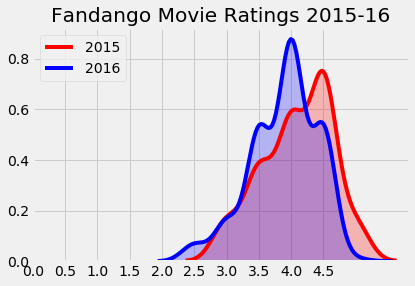

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
%matplotlib inline

plt.style.use("fivethirtyeight")
movie_ratings_16.columns
movie_ratings_16.head()

sns.kdeplot(data=fandango["Fandango_Stars"], shade=True, color="r",label="2015").set_title("Fandango Movie Ratings 2015-16")
sns.kdeplot(data=movie_ratings_16["fandango"], shade=True, color="b", label="2016").set_xticks(arange(0,5,0.5))

Both plots above show right-skewed distribution. The mean for the 2016 distribution does appear to be rated lower. The difference looks to be roughly 0.5 star difference.

In [70]:
fandango15["Fandango_Stars"].value_counts(normalize=True).sort_index() * 100

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [71]:
movie_ratings_16["fandango"].value_counts(normalize=True).sort_index() * 100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

When comparing frequency distributions, it often helps to normalize the values so that we are looking at the values on an even plane. Comparing the two tables confirms our findings with the KDE plot--that there is a difference between the ratings in 2015 and 2016, and that the ratings in 2016 trend lower than 2015. Looking at the ratings closer though, it does show that maybe the difference is not as clear. For instance, the number of 3.5 stars isn't that big between the two sets.

In [73]:
summary_stats = pd.DataFrame(columns=["measure", "year", "value"])

Text(0.5, 1.0, 'Comparing Summary Statistics 2015-16')

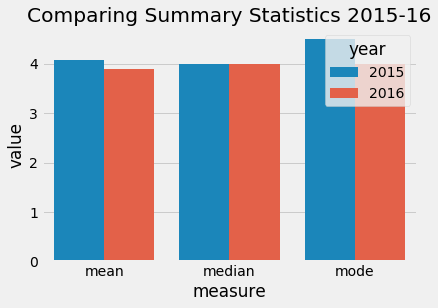

In [131]:
def compute_summary(col):
    stats = []
    stats.append(col.mean())
    stats.append(col.median())
    stats.append(col.mode()[0])
    return stats

colss = ["year", "measure", "value"]
compute_summary(fandango15["Fandango_Stars"])
summary15 = compute_summary(fandango15["Fandango_Stars"])
summary16 = compute_summary(movie_ratings_16["fandango"])

s = []
datasets = [fandango15["Fandango_Stars"], movie_ratings_16["fandango"]]
years = [2015, 2016]
i = 0
for dataset in datasets:
    for measure in ["mean","median","mode"]:
        row = []
        row.append(years[i])
        row.append(measure)
        if measure == "mean":
            row.append(dataset.mean())
        elif measure == "median":
            row.append(dataset.median())
        elif measure == "mode":
            row.append(dataset.mode()[0])
        s.append(row)
    i+=1

summary = pd.DataFrame(s, columns=cols)
summary
ax = sns.barplot(x="measure", y="value", hue="year", data=summary)
ax.set_title("Comparing Summary Statistics 2015-16")

These measures of central tendency between the two years do not have much variation, aside from possibly the mode.

## Conclusion

Our analysis showed that 2016 movie ratings on Fandango overall are lower when compared to that of 2015. While there is some evidence that Fandango making changes to their rating may have lowered the overall ratings for 2016, a more thorough analysis with more complete data is required in order to make that comparison.